
<div dir=ltr align=center>

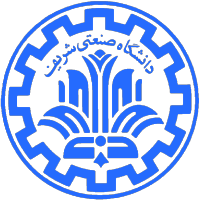

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Clustering: K-Means Clustering<br>
<font color=696880 size=4>
    Prepared by Benyamin Ghanbari <br>

<font color=696880 size=2>
    Curated by Alireza Mirshafieian

____

# Student Information

In [1]:
student_number = '402110916'
full_name = 'Mohamadreza Izady'

### Image Segmentation Using K-Means Clustering for Color-Based Region Extraction

### Description:

In this project, you will implement **K-Means clustering from scratch** and use it to perform image segmentation based on color similarity. **Image segmentation** is the process of dividing an image into meaningful regions. In this assignment, segmentation is done using **color clustering**, where every pixel is grouped into one of K color clusters.

**⚠️ Notice:** You are allowed to use **only the imported libraries** and must **follow the provided function structure**.



# 📝 **Project Instructions**

1. **Load the image**  
   Load the input image and convert it into an **RGB numerical array**.

2. **Reshape image to pixels**  
   Flatten the image into a **2D array**, where each row represents one pixel (**R, G, B**).

3. **Initialize K cluster centers**  
   Randomly select **K pixels** to serve as the starting cluster centers.

4. **Assign pixels to nearest cluster**  
   Compute **distances** and assign each pixel to the **closest cluster center**.

5. **Update cluster centers**  
   Recalculate each center as the **mean color** of all pixels assigned to that cluster.

6. **K-Means algorithm**  
   Repeat **assignment** and **update steps** until **convergence** or **max iterations**.

7. **Reconstruct segmented image**  
   Replace each pixel with the **color of its assigned cluster center**.

8. **Using the Elbow Method**  
   Compute the Compute Within-Cluster Sum of Squares **WCSS** for various **K values** to help estimate an **optimal K**.

9. **Run the segmentation**  
   Apply your **full K-Means pipeline** to segment the chosen image.

10. **Display results**  
    Plot and **visualize** the original and segmented images **side-by-side**.


# 📤 **Expected Output**

- A **segmented image** produced by your **K-Means implementation**  
- A **plot showing the Elbow Method curve** (**WCSS vs. K**)  
- **Observe** how changing **K** affects segmentation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Loads an image from the specified path and returns it as a NumPy array.

    Args:
        image_path (str): The file path of the image (e.g., './sherk.jpg').

    Returns:
        np.ndarray: The image data as a 3D NumPy array (H, W, 3).
    """
    # For simplicity, override the input path (optional)
    # image_path = './sherk.jpg'

    # 1. Load the image. imread returns a NumPy array.
    data = plt.imread(image_path)

    # Print info for verification
    print(f"Image shape after loading: {data.shape}")
    print(f"Data type: {data.dtype}")

    return data

# Example usage
# image_data = load_image('./sherk.jpg')



In [4]:

import numpy as np

# Step 3: Initialize K cluster centers
def initialize_centers(pixels, k):
    """
    Randomly choose K unique pixels as initial cluster centers.

    Args:
        pixels (np.ndarray): Array of shape (N, 3)
        k (int): Number of clusters

    Returns:
        np.ndarray: Initial centers of shape (k, 3)
    """
    random_indices = np.random.choice(pixels.shape[0], k, replace=False)
    centers = pixels[random_indices]
    return centers


# Step 4: Assign pixels to nearest cluster
def assign_clusters(pixels, centers):
    """
    Assign each pixel to the closest cluster center.

    Args:
        pixels (np.ndarray): Array of shape (N, 3)
        centers (np.ndarray): Array of shape (k, 3)

    Returns:
        np.ndarray: Cluster labels of shape (N,)
    """
    # Compute distance from each pixel to each center
    # distances shape: (N, k)
    distances = np.linalg.norm(pixels[:, None] - centers[None, :], axis=2)

    # Pick cluster with smallest distance
    labels = np.argmin(distances, axis=1)
    return labels


# Step 5: Update cluster centers
def update_centers(pixels, labels, k):
    """
    Compute new cluster centers as the mean of assigned pixels.

    Args:
        pixels (np.ndarray): Array of shape (N, 3)
        labels (np.ndarray): Array of shape (N,)
        k (int): Number of clusters

    Returns:
        np.ndarray: Updated centers of shape (k, 3)
    """
    new_centers = []
    for cluster in range(k):
        cluster_pixels = pixels[labels == cluster]

        # Avoid empty cluster by reinitializing randomly
        if len(cluster_pixels) == 0:
            new_centers.append(pixels[np.random.choice(pixels.shape[0])])
        else:
            new_centers.append(cluster_pixels.mean(axis=0))

    return np.array(new_centers)


# Step 6: Full K-Means algorithm
def kmeans(pixels, k, max_iters=10, tol=1e-4):
    """
    Runs K-Means clustering on image pixels.

    Args:
        pixels (np.ndarray): Array of shape (N, 3)
        k (int): Number of clusters
        max_iters (int): Maximum iterations
        tol (float): Convergence tolerance

    Returns:
        centers (np.ndarray): Final cluster centers
        labels (np.ndarray): Cluster labels for each pixel
    """
    centers = initialize_centers(pixels, k)

    for i in range(max_iters):
        old_centers = centers.copy()
        labels = assign_clusters(pixels, centers)
        centers = update_centers(pixels, labels, k)

        # Convergence check
        shift = np.linalg.norm(centers - old_centers)
        print(f"Iteration {i+1}, center shift = {shift:.6f}")

        if shift < tol:
            print("Converged!")
            break

    return centers, labels


In [5]:

# Step 7: Reconstruct segmented image
def recreate_image(labels, centers, image_shape):
    """
    Reconstructs the segmented image using the cluster labels and centers.

    Args:
        labels (np.ndarray): Array of shape (N,) with cluster index for each pixel.
        centers (np.ndarray): Array of shape (k, 3) with RGB values for each cluster.
        image_shape (tuple): Original image shape (H, W, 3)

    Returns:
        np.ndarray: Reconstructed segmented image of shape (H, W, 3)
    """
    H, W, _ = image_shape

    # Replace each pixel label with its cluster center color
    segmented_flat = centers[labels]

    # Reshape back to image shape
    segmented = segmented_flat.reshape(H, W, 3)

    return segmented


In [6]:
# Step 8: Elbow Method

def calculate_wcss(pixels, max_k=10):
    """
    Computes the Within-Cluster Sum of Squares (WCSS) for k = 1 to max_k.

    Args:
        pixels (np.ndarray): Array of shape (N, 3)
        max_k (int): Maximum number of clusters to test

    Returns:
        list: WCSS values for each k
    """
    wcss = []

    for k in range(1, max_k + 1):
        print(f"Computing K-Means for k={k} ...")

        centers, labels = kmeans(pixels, k, max_iters=10)

        # Compute WCSS: sum of squared distances to closest center
        distances = np.linalg.norm(pixels - centers[labels], axis=1)
        wcss_value = np.sum(distances ** 2)
        wcss.append(wcss_value)

        print(f"WCSS for k={k}: {wcss_value}")

    return wcss


def plot_elbow(wcss):
    """
    Plots the elbow graph to help determine the optimal k.

    Args:
        wcss (list): WCSS values computed by calculate_wcss()
    """
    plt.figure(figsize=(8, 5))
    ks = range(1, len(wcss) + 1)

    plt.plot(ks, wcss, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
    plt.grid(True)

    plt.show()



In [7]:
# Step 9: Run the segmentation

def run_segmentation(image_path, k=5):
    # Load the image
    image = load_image(image_path)
    H, W, C = image.shape

    # Flatten into (N, 3)
    pixels = image.reshape(-1, 3)

    # Run K-Means clustering
    print("Running K-Means...")
    centers, labels = kmeans(pixels, k)

    # Reconstruct segmented image
    segmented_image = recreate_image(labels, centers, (H, W, C))

    return image, segmented_image


In [8]:
# Step 10: Display results

def display_results(original, segmented):
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis('off')

    # Segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented.astype(np.uint8))
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()


Image shape after loading: (328, 525, 3)
Data type: uint8
Running K-Means...
Iteration 1, center shift = 135.402683
Iteration 2, center shift = 51.699648
Iteration 3, center shift = 38.038775
Iteration 4, center shift = 74.649065
Iteration 5, center shift = 47.624802
Iteration 6, center shift = 27.100910
Iteration 7, center shift = 12.815691
Iteration 8, center shift = 6.836701
Iteration 9, center shift = 3.897620
Iteration 10, center shift = 2.236965


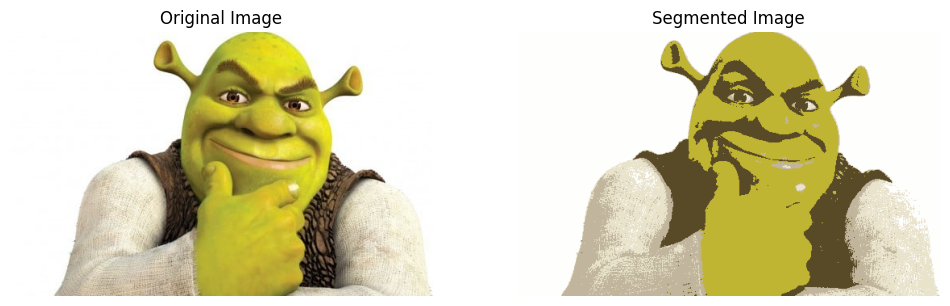

In [9]:
k = 5   # choose number of clusters
# Update the path to your image file in Google Drive
image_file_path = 'shrek.jpg' # <--- Please change this path if your image is in a different location
original, segmented = run_segmentation(image_file_path, k)
display_results(original, segmented)